# Glicksberg Lab Coding Task--Yan Feng

NOTES:
    
1. When doing the previous qustions, I didn't know what the problem I would have in the next question, so there maybe some   steps repeated. 
    
2. When preprocessing the data, since I didn't know the meaning of some data like comments and data like>60, I just remove them. In the later work if I know better of the data, I would better preprocess the data.
    
3. When dealing with missing data, I fill the data with random numbers (which wouldn't change the distribution of the data) and mode

4. for column with multiple features(>5), I use their count numbers to represent the feature. if all is dealed with by encoding, the dimension of the date will be too big.
    
5. I finish the first 4 questions using 3 hours. I followed the steps to finish the first qustion and found some problem after transform the format and I went back to change, which is pretty time consuming. if speed is a critria I want to make this cleared here.

In [2]:
import sqlite3
import pandas as pd
import numpy as np

In [3]:
pip install csv-to-sqlite

Note: you may need to restart the kernel to use updated packages.


In [4]:
import csv_to_sqlite 

In [5]:
options = csv_to_sqlite.CsvOptions(typing_style="full", encoding="windows-1250") 
input_files = ["LabData.csv", "PatientData.csv"] # pass in a list of CSV files
csv_to_sqlite.write_csv(input_files, "database.sqlite", options)

Written 362073 rows into 2 tables in 1.740 seconds


# Step 1a

In [6]:
#extract data
database=sqlite3.connect('database.sqlite')
orderdata=pd.read_sql_query('select MRN,Lab_Code,Lab_Result_Time,Lab_Result from LabData order by MRN,Lab_Code,Lab_Result_Time asc',database)

In [7]:
orderdata['Lab_Result_Time_convert'] = pd.to_datetime(orderdata['Lab_Result_Time'], format='%Y%m%d%H%M')
df = orderdata[['MRN','Lab_Code','Lab_Result_Time_convert', 'Lab_Result']]
df.head(2)

,MRN,Lab_Code,Lab_Result_Time_convert,Lab_Result
0,0,251,2018-04-28 08:00:00,81.5
1,0,251,2018-04-29 08:27:00,57.6


In [8]:
MRN=df['MRN']
MRN=np.array(MRN)
ind0=[]
for i in range(0,len(MRN)-1):
    if MRN[i]!=MRN[i+1]:
        ind0.append(i)
        
Lab_Code=df['Lab_Code']
Lab_Code=np.array(Lab_Code)
ind=[]
for i in range(0,len(Lab_Code)-1):
    if Lab_Code[i]!=Lab_Code[i+1]:
        ind.append(i)
        
Result_Time=df['Lab_Result_Time_convert']
Result_Time=np.array(Result_Time)

Lab_Result=df['Lab_Result']
Lab_Result=np.array(Lab_Result)

In [9]:
#create time split point
def change2str(date):
    ts = pd.to_datetime(str(date)) 
    d = ts.strftime('%Y-%m-%d %H:%M:%S')
    return d   

import datetime
timewindow=[]
for i in range(len(ind)):
    datetimeFormat = '%Y-%m-%d %H:%M:%S'
    if i==0:
        date1=change2str(Result_Time[0])
        date2 = change2str(Result_Time[ind[i]])
    if i!=0:
        date1 = change2str(Result_Time[ind[i-1]+1])
        date2 = change2str(Result_Time[ind[i]])
    diff = datetime.datetime.strptime(date2, datetimeFormat)- datetime.datetime.strptime(date1, datetimeFormat)
    periods=(diff.days*24+diff.seconds/3600)//12+2
    dt=pd.date_range(end=Result_Time[ind[i]],periods=periods,freq='12h')
    timewindow.append(dt)

timewindow[0]

DatetimeIndex(['2018-04-28 07:00:00', '2018-04-28 19:00:00',
               '2018-04-29 07:00:00', '2018-04-29 19:00:00',
               '2018-04-30 07:00:00', '2018-04-30 19:00:00',
               '2018-05-01 07:00:00', '2018-05-01 19:00:00',
               '2018-05-02 07:00:00', '2018-05-02 19:00:00'],
              dtype='datetime64[ns]', freq='12H')

In [10]:
#create time window
d=[]
for i in timewindow:
    dt=pd.DataFrame(i)
    dt=np.array(dt)
    d.append(dt)
#time_window+empty value
a=[]
for n in range(0,len(d)):
    a.append([])
    for j in range(1,len(d[n])):
        a[n].append([[d[n][j-1],d[n][j]],[]])
a[0]

[[[array(['2018-04-28T07:00:00.000000000'], dtype='datetime64[ns]'),
   array(['2018-04-28T19:00:00.000000000'], dtype='datetime64[ns]')],
  []],
 [[array(['2018-04-28T19:00:00.000000000'], dtype='datetime64[ns]'),
   array(['2018-04-29T07:00:00.000000000'], dtype='datetime64[ns]')],
  []],
 [[array(['2018-04-29T07:00:00.000000000'], dtype='datetime64[ns]'),
   array(['2018-04-29T19:00:00.000000000'], dtype='datetime64[ns]')],
  []],
 [[array(['2018-04-29T19:00:00.000000000'], dtype='datetime64[ns]'),
   array(['2018-04-30T07:00:00.000000000'], dtype='datetime64[ns]')],
  []],
 [[array(['2018-04-30T07:00:00.000000000'], dtype='datetime64[ns]'),
   array(['2018-04-30T19:00:00.000000000'], dtype='datetime64[ns]')],
  []],
 [[array(['2018-04-30T19:00:00.000000000'], dtype='datetime64[ns]'),
   array(['2018-05-01T07:00:00.000000000'], dtype='datetime64[ns]')],
  []],
 [[array(['2018-05-01T07:00:00.000000000'], dtype='datetime64[ns]'),
   array(['2018-05-01T19:00:00.000000000'], dtype='date

In [11]:
#result_time
b=[[] for n in range(0,len(ind))]
for i in range(len(ind)):
    if i==0:
        for j in range(0,ind[0]+1):
            b[0].append([Result_Time[j],Lab_Result[j]])
    if i!=0:
        for j in range(ind[i-1]+1,ind[i]):
            b[i].append([Result_Time[j],Lab_Result[j]])

b[0]

[[numpy.datetime64('2018-04-28T08:00:00.000000000'), '81.5'],
 [numpy.datetime64('2018-04-29T08:27:00.000000000'), '57.6'],
 [numpy.datetime64('2018-04-30T09:50:00.000000000'), '49.4'],
 [numpy.datetime64('2018-05-01T09:25:00.000000000'), '49'],
 [numpy.datetime64('2018-05-02T10:30:00.000000000'), '37.8'],
 [numpy.datetime64('2018-05-02T19:00:00.000000000'), '30.5']]

In [12]:
for i in range(len(a)):
    for j in range(len(a[i])):
        for m in range(len(b[i])):
            if b[i][m][0] > a[i][j][0][0] and b[i][m][0]<=a[i][j][0][1]:
                a[i][j][1].append(b[i][m][1])
        if a[i][j][1]==[]:
                a[i][j][1].append(0)
a[0]        

[[[array(['2018-04-28T07:00:00.000000000'], dtype='datetime64[ns]'),
   array(['2018-04-28T19:00:00.000000000'], dtype='datetime64[ns]')],
  ['81.5']],
 [[array(['2018-04-28T19:00:00.000000000'], dtype='datetime64[ns]'),
   array(['2018-04-29T07:00:00.000000000'], dtype='datetime64[ns]')],
  [0]],
 [[array(['2018-04-29T07:00:00.000000000'], dtype='datetime64[ns]'),
   array(['2018-04-29T19:00:00.000000000'], dtype='datetime64[ns]')],
  ['57.6']],
 [[array(['2018-04-29T19:00:00.000000000'], dtype='datetime64[ns]'),
   array(['2018-04-30T07:00:00.000000000'], dtype='datetime64[ns]')],
  [0]],
 [[array(['2018-04-30T07:00:00.000000000'], dtype='datetime64[ns]'),
   array(['2018-04-30T19:00:00.000000000'], dtype='datetime64[ns]')],
  ['49.4']],
 [[array(['2018-04-30T19:00:00.000000000'], dtype='datetime64[ns]'),
   array(['2018-05-01T07:00:00.000000000'], dtype='datetime64[ns]')],
  [0]],
 [[array(['2018-05-01T07:00:00.000000000'], dtype='datetime64[ns]'),
   array(['2018-05-01T19:00:00.000

In [13]:
count=df.groupby(['MRN'])['Lab_Code'].unique().reset_index()
count=np.array(count['Lab_Code'])
number=[]
for i in count:
    number.append(len(i))

i=0
x=[]
sum=0
for m in number:
    step=m
    b=a[i:i+step]
    for j in range(len(b)):
        sum+=len(b[j])
    x.append(sum)
    sum=0
    i+=step

In [14]:
mrn=[]
p=0
for i in x:
    for j in range(i):
        mrn.append(p)
    p+=1
    
lab=[]
time_point=[]
start_time=[]
end_time=[]
value=[]

for i in range(len(a)):
        #lab.append(Lab_Code[i])
    for j in range(len(a[i])):
            
        lab.append(Lab_Code[ind[i]])
        time_point.append(j+1)
        start_time.append(a[i][j][0][0])
        end_time.append(a[i][j][0][1])
        value.append(a[i][j][1])
        

In [15]:
def changedata(data):
    time1=[]
    for i in range(len(data)):
        d=str(data[i])
        time=d[2:6]+d[7:9]+d[10:12]+d[13:15]+d[16:18]
        time1.append(int(time))
    return time1

In [16]:
mrn=pd.DataFrame(mrn)
lab=pd.DataFrame(lab)
time_point=pd.DataFrame(time_point)
start_time=changedata(start_time)
start_time=pd.DataFrame(start_time)
end_time=changedata(end_time)
end_time=pd.DataFrame(end_time)

value=np.array(value)
value=pd.DataFrame(value)

In [17]:
df1 = pd.concat([mrn,lab,time_point,start_time,end_time,value],axis=1)
df1.columns =['MRN','Lab_Code','Time_point','Time point start','Time point end','Value']
df1.head(2)

,MRN,Lab_Code,Time_point,Time point start,Time point end,Value
0,0,251,1,201804280700,201804281900,[81.5]
1,0,251,2,201804281900,201804290700,[0]


In [18]:
sumvalue=0
countvalue=0
data=df1['Value']
v=[]
for i in range(len(data)):
    try:
        for j in data[i]:
            m=float(j)
            sumvalue+=m
            countvalue+=1
            mean=sumvalue/countvalue
        v.append(round(mean,2))
        sumvalue=0
        countvalue=0        
    except:
        v.append(10000)


In [19]:
value1=pd.DataFrame(v)
df1['Value']=value1
df11=df1.drop(df1[df1.Value==10000].index)
df11.head(10)

,MRN,Lab_Code,Time_point,Time point start,Time point end,Value
0,0,251,1,201804280700,201804281900,81.50
1,0,251,2,201804281900,201804290700,0.00
2,0,251,3,201804290700,201804291900,57.60
3,0,251,4,201804291900,201804300700,0.00
4,0,251,5,201804300700,201804301900,49.40
5,0,251,6,201804301900,201805010700,0.00
6,0,251,7,201805010700,201805011900,49.00
7,0,251,8,201805011900,201805020700,0.00
8,0,251,9,201805020700,201805021900,34.15
9,0,1105,1,201804272015,201804280815,2.90


# Step 1b

In [20]:
def agg(data):
    li=[]
    for i in data:
        li.append(i)
    return li
labdata=df1.groupby(['MRN','Lab_Code'])['Value'].apply(agg).reset_index()
labdata.head(3000)

,MRN,Lab_Code,Value
0,0,251,"[81.5, 0.0, 57.6, 0.0, 49.4, 0.0, 49.0, 0.0, 3..."
1,0,1105,"[2.9, 0.0, 2.8, 0.0, 0.0, 3.0, 3.0, 0.0, 0.0, ..."
2,0,1111,"[0.6, 0.3, 0.0, 0.3, 0.0, 0.1, 0.0, 0.15, 0.0,..."
3,0,1112,"[0.3, 0.0, 0.4, 0.0, 0.0, 0.3, 0.3, 0.0, 0.0, ..."
4,0,1116,"[8.2, 0.0, 8.4, 0.0, 0.0, 8.45, 8.5, 8.5, 0.0,..."
...,...,...,...
2995,56,2604,"[27.8, 28.5, 0.0, 28.6, 0.0, 0.0, 28.6, 25.9, ..."
2996,56,2605,"[101.3, 102.2, 0.0, 102.8, 0.0, 0.0, 101.1, 10..."
2997,56,2606,"[34.5, 34.9, 0.0, 35.2, 0.0, 0.0, 34.4, 35.0, ..."
2998,56,2607,"[34.1, 34.1, 0.0, 34.2, 0.0, 0.0, 34.0, 34.6, ..."


# Step 1c

In [21]:
patientdata=pd.read_sql_query('select*from PatientData',database)
merge2table=pd.merge(left=orderdata,right=patientdata,left_on='MRN',right_on='MRN')
merge2table=merge2table.drop(['Lab_Result_Time_convert'],axis=1)
merge2table['Lab_Result_Time']=pd.to_numeric(merge2table['Lab_Result_Time'])
merge2table.head()

,MRN,Lab_Code,Lab_Result_Time,Lab_Result,Gender,Race,Marital_Status,Religion,Ethnic_Group,label
0,0,251,201804280800,81.5,M,O,S,CAT,24,0
1,0,251,201804290827,57.6,M,O,S,CAT,24,0
2,0,251,201804300950,49.4,M,O,S,CAT,24,0
3,0,251,201805010925,49,M,O,S,CAT,24,0
4,0,251,201805021030,37.8,M,O,S,CAT,24,0


In [22]:
merge2table.to_csv('MD.csv', index=False)
input_files = ["MD.csv"] # pass in a list of CSV files
csv_to_sqlite.write_csv(input_files, "database.sqlite", options)

Written 361073 rows into 1 tables in 2.058 seconds


In [23]:
data=pd.read_sql_query('select Lab_Result,Gender,Race,Marital_Status,Religion,Ethnic_Group from MD \
                       where Lab_Code=251 and MRN=0 and Lab_Result_Time>201804300000' ,database)
data

,Lab_Result,Gender,Race,Marital_Status,Religion,Ethnic_Group
0,49.4,M,O,S,CAT,24
1,49,M,O,S,CAT,24
2,37.8,M,O,S,CAT,24
3,30.5,M,O,S,CAT,24


In [24]:
merge2table.to_csv('0_251_value.csv', index=False)

# Step 2

In [25]:
#distribution plot of lab:
labdata.to_csv('labtrans.csv', index=False)
input_files = ["labtrans.csv"] # pass in a list of CSV files
csv_to_sqlite.write_csv(input_files, "database.sqlite", options)
data1=pd.read_sql_query('select Value from labtrans where Lab_Code=251' ,database)

Written 40300 rows into 1 tables in 0.232 seconds


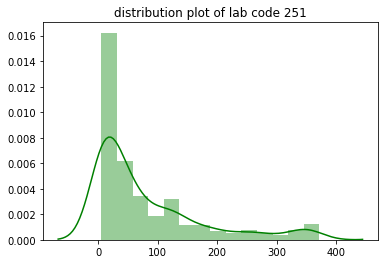

In [26]:
valuearray=np.array(data1)
valuelen=[]
for i in valuearray:
    for j in i:
        valuelen.append(len(j))
value_251=pd.DataFrame(valuelen)

import seaborn as sns
x=value_251[0].values
plot1=sns.distplot(x,color='green').set_title("distribution plot of lab code 251")
plot1=plot1.get_figure()
plot1.savefig('plot1.png')

In [27]:
#for MRN0,create a line chart:y-->lab value,x-->time
orderdata.to_csv('orderdata.csv', index=False)
input_files = ["orderdata.csv"] # pass in a list of CSV files
csv_to_sqlite.write_csv(input_files, "database.sqlite", options)
data2=pd.read_sql_query('select Lab_Result_Time_convert, Lab_Result from orderdata group by Lab_Result_Time_convert having MRN=0' ,database)

Written 361073 rows into 1 tables in 1.718 seconds


In [28]:
data=data2['Lab_Result']
v1=[]
for i in range(len(data)):
    try:
        m=float(data[i])
        v1.append(m)     
    except:
        v1.append(10000)
value2=pd.DataFrame(v1)
data2['Lab_Result']=value2
data2=data2.drop(data2[data2.Lab_Result==10000].index)

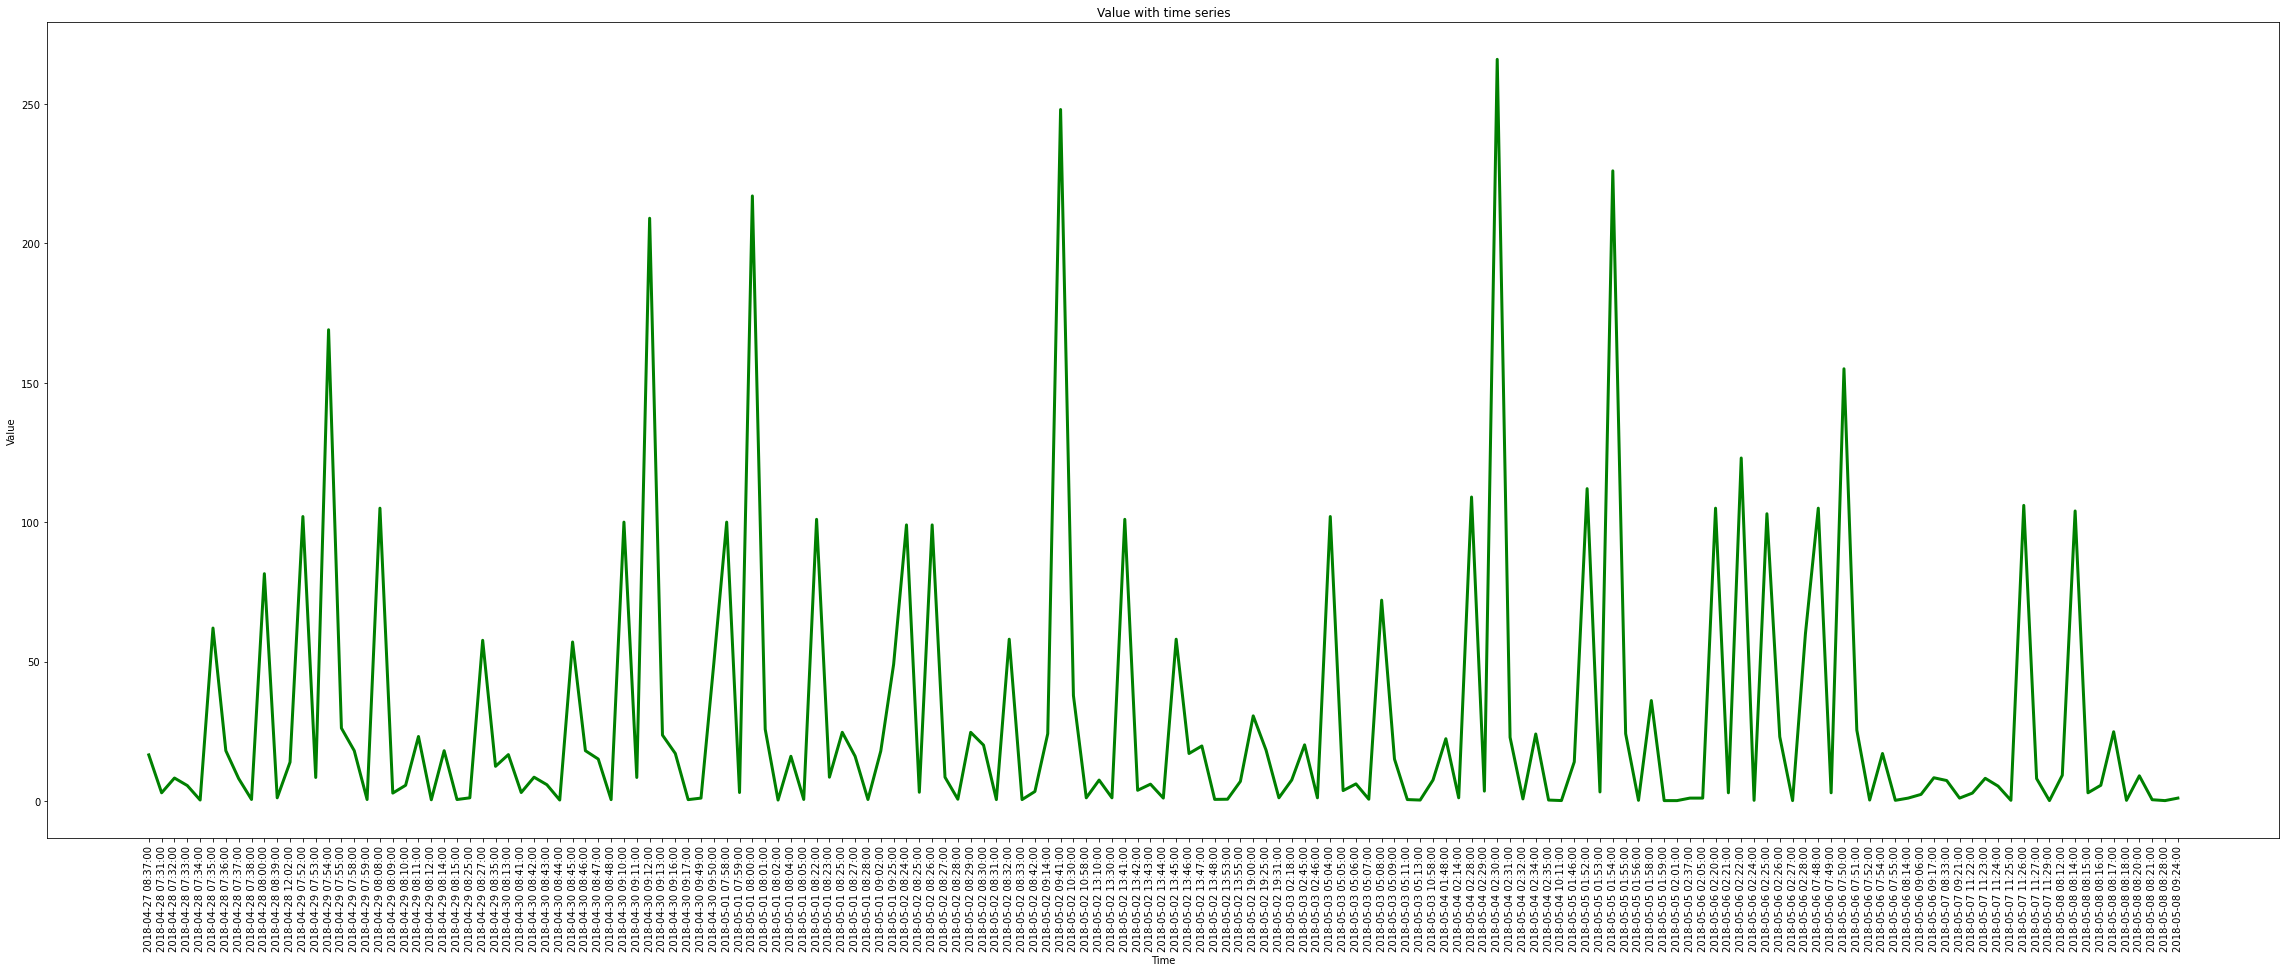

In [29]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(40,15))
x=data2['Lab_Result_Time_convert']
y=data2['Lab_Result']
plt.xticks(rotation=90)
plt.title('Value with time series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(x,y,color='g',linewidth=3)
plt.show()
fig.savefig('plot2.png')

In [30]:
#aggregated value
df1.to_csv('df11.csv', index=False)
input_files = ["df11.csv"] # pass in a list of CSV files
csv_to_sqlite.write_csv(input_files, "database.sqlite", options)
data3=pd.read_sql_query('select Value from df11 where Lab_Code=251 and MRN=0' ,database)

Written 562351 rows into 1 tables in 3.919 seconds


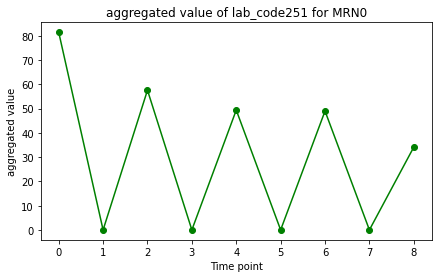

In [31]:
fig=plt.figure(figsize=(7,4))
x=data3['Value']
plt.title('aggregated value of lab_code251 for MRN0')
plt.xlabel('Time point')
plt.ylabel('aggregated value')
plt.plot(x,marker='o',color='g',linewidth=1.5)
plt.show()
fig.savefig('plot3.png')

# Step 3

In [32]:
#dataset we use
merge2table.head(2)

,MRN,Lab_Code,Lab_Result_Time,Lab_Result,Gender,Race,Marital_Status,Religion,Ethnic_Group,label
0,0,251,201804280800,81.5,M,O,S,CAT,24,0
1,0,251,201804290827,57.6,M,O,S,CAT,24,0


In [33]:
merge2table['Gender'].value_counts()

F    217823
M    143250
Name: Gender, dtype: int64

In [34]:
data4=merge2table[['MRN','Gender']]
data5=pd.get_dummies(data4['Gender'])
dataout=pd.concat([data4['MRN'],data5['M'],data5['F']],axis=1)
dataout.columns=['MRN','Gender_F','Gender_M']
dataout.to_csv('gender_encoding.csv', index=False)
dataout.head()

,MRN,Gender_F,Gender_M
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


# Step 4

In [35]:
#preprocess the data-->replce '' as NaN
def preprocess(data):
    d=np.array(data)
    p=[]
    for i in d:
        if i=='':
            p.append(np.nan)
        else:
            p.append(i)
    completedata=pd.DataFrame(p)
    return completedata

In [36]:
merge2table['Race']=preprocess(merge2table['Race'])
merge2table['Marital_Status']=preprocess(merge2table['Marital_Status'])
merge2table['Religion']=preprocess(merge2table['Religion'])
merge2table['Ethnic_Group']=preprocess(merge2table['Ethnic_Group'])

In [37]:
#replace the missing value with random number(will not change the distribution of data)
def replace_nan(data,variable):
    data[variable+'_random']=data[variable]
    random_sample=data[variable].dropna().sample(data[variable].isnull().sum(),random_state=0)
    random_sample.index=data[data[variable].isnull()].index
    data.loc[data[variable].isnull(),variable+'_random']=random_sample

In [38]:
replace_nan(merge2table,'Race')
replace_nan(merge2table,'Marital_Status')
replace_nan(merge2table,'Religion')
replace_nan(merge2table,'Ethnic_Group')

In [39]:
x=merge2table[['Lab_Result','Gender','Race_random','Marital_Status_random','Religion_random','Ethnic_Group_random','label']]

In [40]:
def countmap(data):
    countmap=data.value_counts().to_dict()
    data=data.map(countmap)
    return data   

In [41]:
x['Race_random']=countmap(x['Race_random'])
x['Marital_Status_random']=countmap(x['Marital_Status_random'])
x['Religion_random']=countmap(x['Religion_random'])

C:\Users\yifan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\yifan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\yifan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [43]:
def preprocess1(data,mode):
    d=np.array(data)
    p=[]
    for i in d:
        if i=='N' or i=='U':
            p.append(33)#mode
        else:
            p.append(i)
    completedata=pd.DataFrame(p)
    return completedata

In [44]:
mode=x['Ethnic_Group_random'].mode()
m=preprocess1(x['Ethnic_Group_random'],mode)
x['Ethnic_Group_random']=m

C:\Users\yifan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
datagender=pd.get_dummies(merge2table['Gender'])
x['Female']=datagender['F']
x['Male']=datagender['M']

C:\Users\yifan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\yifan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
sumvalue=0
countvalue=0
data=x['Lab_Result']
v=[]
for i in range(len(data)):
    try:
        for j in data[i]:
            m=float(j)
            sumvalue+=m
            countvalue+=1
            mean=sumvalue/countvalue
        v.append(round(mean,2))
        sumvalue=0
        countvalue=0        
    except:
        v.append(10000)
value1=pd.DataFrame(v)
x['Lab_Result']=value1
x=x.drop(x[x.Lab_Result==10000].index)

C:\Users\yifan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [50]:
y=x['label']
x=x.drop(['Gender','label'],axis=1)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [54]:
dt=DecisionTreeClassifier(random_state=123)
dt.fit(x_train,y_train)
dt_model=dt.predict(X=x_train)
dt_predicted=dt.predict(X=x_test)
train_report=metrics.classification_report(y_train,dt_model)
print(train_report)
test_report=metrics.classification_report(y_test,dt_predicted)
print(test_report)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     39872
           1       0.86      0.86      0.86     46832

    accuracy                           0.85     86704
   macro avg       0.85      0.85      0.85     86704
weighted avg       0.85      0.85      0.85     86704

              precision    recall  f1-score   support

           0       0.79      0.80      0.79     16953
           1       0.83      0.82      0.82     20207

    accuracy                           0.81     37160
   macro avg       0.81      0.81      0.81     37160
weighted avg       0.81      0.81      0.81     37160



# Step 5

In [55]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,dt_predicted)
cm

array([[13513,  3440],
       [ 3669, 16538]], dtype=int64)

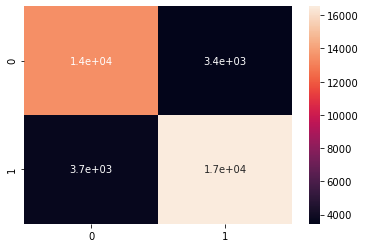

In [56]:
sns.heatmap(cm,annot=True)

In [57]:
from sklearn.metrics import roc_curve, auc
def ROC_plot(Classifier, x, y):
    plt.style.use('ggplot')
    %matplotlib inline
    
    classifier = Classifier
    y_predict_probabilities = classifier.predict_proba(x)
    y_score = y_predict_probabilities[:, 1]

    fpr, tpr, _ = roc_curve(y, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [58]:
def performance_tabel(model,sample,cm):
    print('{:<112}'.format('Model:'+model))
    print('Total_samples:',sample)
    
    TP = cm[1][1]
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
   #print('True Positives:', TP)
   #print('True Negatives:', TN)
   #print('False Positives:', FP)
   #print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (TP+TN) / (TP + TN + FP + FN)
    # calculate recall
    conf_recall = TP / (TP + FN)
    # calculate precision
    conf_precision = TN / (TN + FP)
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_recall) / (conf_precision + conf_recall))
    # calculate the sensitivity
    conf_sensitivity = TP / (TP + FN)
    # calculate the specificity
    conf_specificity = TN / (TN + FP)
    
    print('{}'.format('-'*55))
    print('Accuracy:',round(conf_accuracy,5))
    print('Recall:',round(conf_recall,5)) 
    print('Sensitivity:',round(conf_sensitivity,5))
    print('pecificity:',round(conf_specificity,5)) 
    print('Precision:',round(conf_precision,5))
    print('f_1 Score:', round(conf_f1,5))
    
    print('{}'.format('-'*55))
    print('{:<112}'.format('ROC_curve:'))
    print(ROC_plot(dt, x_test, y_test))

Model:Decision Tree                                                                                             
Total_samples: 123864
-------------------------------------------------------
Accuracy: 0.80869
Recall: 0.81843
Sensitivity: 0.81843
pecificity: 0.79709
Precision: 0.79709
f_1 Score: 0.80762
-------------------------------------------------------
ROC_curve:                                                                                                      


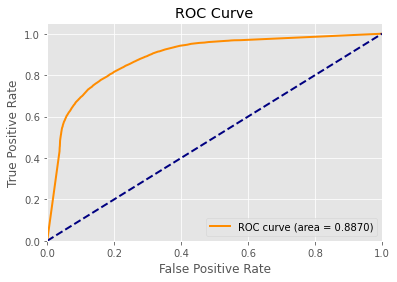

None


In [59]:
performance_tabel('Decision Tree',len(x),cm)